## Transformations

In the manufacture of soft contact lenses, the actual strength (power) of the lens needs to be very close to the target value for the lenses to properly fit the customer’s needs. In the paper, ‘‘An ANOM-type test for variances from normal populations,’’ Technometrics (1997), 39: 274 – 283, a comparison of several suppliers is made relative to the consistency of the power of the lenses. The following table contains the deviations from the target power of lenses produced using materials from three different suppliers:


In [4]:
data <- matrix(scan(text="
189.9 191.9 190.9 183.8 185.5 190.9 192.8 188.4 189.0
158.4 156.6 157.7 154.1 152.3 161.5 158.1 150.9 156.9 
218.6 208.4 187.1 199.5 202.0 211.1 197.6 204.4 206.8"), ncol=9, nrow=3, byrow=T)
row.names(data) <- c("A", "B", "C")
colnames(data) <- paste("lens", 1:9, sep="_")

library(reshape2)
data_m <- melt(data)
colnames(data_m)<- c("supplier", "lens", "pow")
data_m <- data_m[,c("supplier", "pow")]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


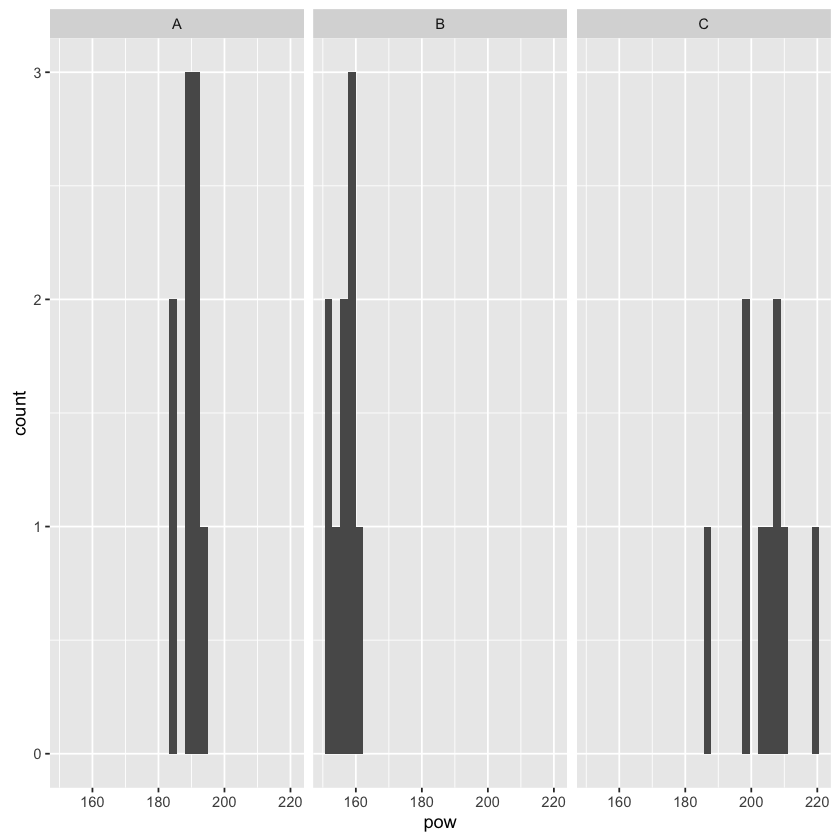

In [5]:
library(ggplot2)

ggplot(aes(pow), data=data_m) + geom_histogram()+facet_wrap(~supplier)

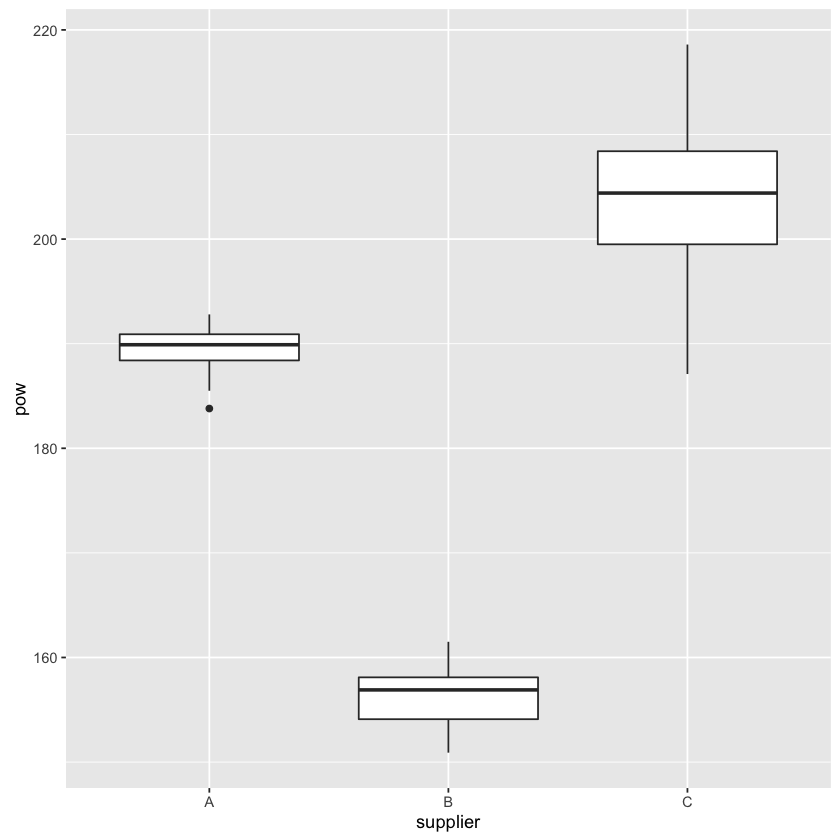

In [6]:
ggplot(aes(supplier,pow), data=data_m) + geom_boxplot()

#### You can ignore the bottom two plots. Do the residuals look homoskedastic and normal?

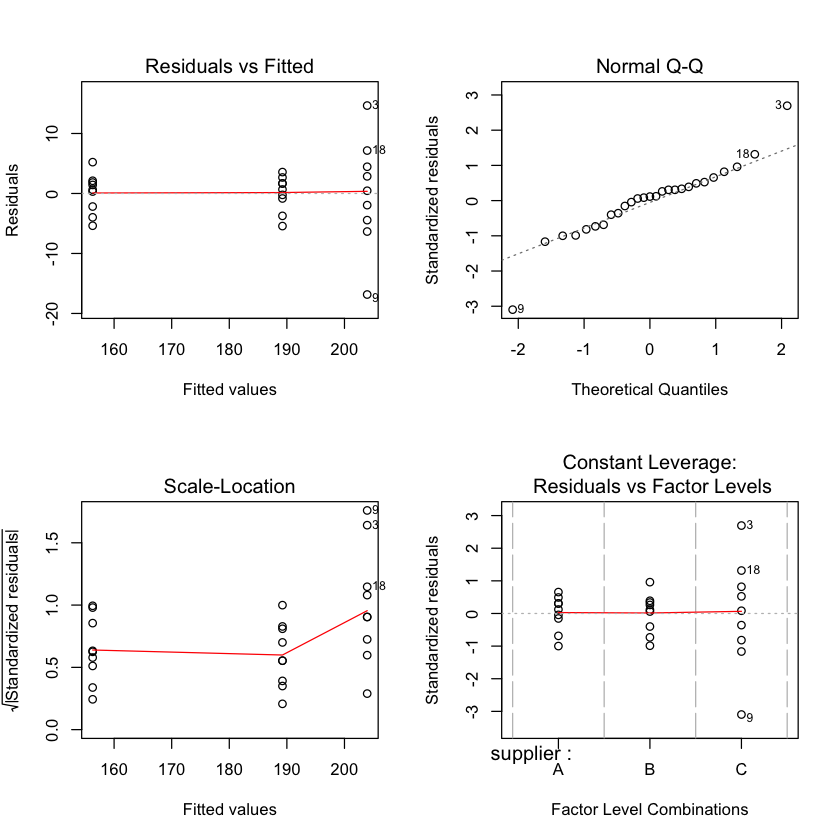

In [7]:
## fit the linear model

mod <- lm(pow ~ supplier, data=data_m)
par(mfrow=c(2,2))
plot(mod)


In [8]:
## here's the residuals

res <- residuals(mod)

#### 1. Using the appropriate tests and plots given here, assess whether the data meet the necessary conditions to use an AOV to determine whether there is a significant difference in the mean deviations for the three suppliers.

In [9]:
tab<-matrix(c(shapiro.test(x = res)$p.value,
         shapiro.test(x = res)$statistic),
       ncol=2, nrow=1, byrow=T)

colnames(tab)<-c("P Value", "Test Statistic")
tab

P Value,Test Statistic
0.04524638,0.92245197


#### 2. Conduct an AOV with $\alpha=0.05$.

In [10]:
mod <- lm(pow ~ supplier, data=data_m)
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
supplier,2,10723.79,5361.895,161.0868,1.233123e-14
Residuals,24,798.8578,33.28574,NA,NA


#### 3. Apply the Kruskal–Wallis test to evaluate the research hypothesis that the three suppliers have different distributions of deviations.

In [7]:
tab<-matrix(c(kruskal.test(pow ~ supplier, data=data_m)$p.value,
         kruskal.test(pow ~ supplier, data=data_m)$statistic),
       ncol=2, nrow=1, byrow=T)

colnames(tab)<-c("P Value", "Test Statistic")
tab

P Value,Test Statistic
2.343916e-05,2.132221e+01


#### 4. Suppose that a difference in mean deviation of 20 units would have commercial consequences for the manufacture of the lenses. Does there appear to be a practical difference in the three suppliers?

In [12]:
summary(mod)
mean(data_m$pow)


Call:
lm(formula = pow ~ supplier, data = data_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8444  -2.9556   0.6222   2.3944  14.6556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  189.233      1.923  98.399  < 2e-16 ***
supplierB    -32.956      2.720 -12.117 1.02e-11 ***
supplierC     14.711      2.720   5.409 1.48e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.769 on 24 degrees of freedom
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.9249 
F-statistic: 161.1 on 2 and 24 DF,  p-value: 1.233e-14


[1] 183.1519

#### Researchers from the Department of Fruit Crops at a university compared four different preservatives to be used in freezing strawberries. The researchers prepared the yield from a straw- berry patch for freezing and randomly divided it into four equal groups. Within each group they treated the strawberries with the appropriate preservative and packaged them into eight small plas- tic bags for freezing at 0°C. The bags in group I served as a control group, while those in groups II, III, and IV were assigned one of three newly developed preservatives. After all 32 bags of straw- berries were prepared, they were stored at 0°C for a period of 6 months. At the end of this time, the contents of each bag were allowed to thaw and then rated on a scale of 1 to 10 points for discol- oration. (Note that a low score indicates little discoloration.) The ratings are given in the following data.frame:

In [8]:
## just copy and paste, no need to type all this out.
data <- matrix(scan(text="
10 8 7.5 8 9.5 9 7.5 7 
6 7.5 8 7 6.5 6 5 5.5 
3 5.5 4 4.5 3 3.5 4 4.5 
2 1 2.5 3 4 3.5 2 2"
),ncol=4,nrow=8,byrow=F)

colnames(data)<-c("gr1","gr2","gr3","gr4")
data_m <- melt(data)
data_m <- data_m[2:3]
colnames(data_m)<-c("group", "score")

#### a. Use the following plots of the residuals and a test of the homogeneity of variances to assess whether the conditions needed to use AOV techniques are satisfied with this data set.

In [1]:
## that's an l ("el"), not a 1
modl<-lm(score ~ group, data=data_m)
par(mfrow=c(2,2))
plot(modl)


ERROR: Error in is.data.frame(data): object 'data_m' not found


ERROR: Error in plot(modl): object 'modl' not found


The following are the results from the Shapiro-Wilks test.

In [10]:
tab<-matrix(c(shapiro.test(x = residuals(modl))$p.value,
         shapiro.test(x = residuals(modl))$statistic),
       ncol=2, nrow=1, byrow=T)

colnames(tab)<-c("P Value", "Test Statistic")
tab

P Value,Test Statistic
0.1555143,0.9511642


#### b. Test whether there is a difference in the mean ratings using $\alpha=0.05$.

#### c. Place 95% confidence intervals on the mean ratings for each of the groups.

#### A small corporation makes insulation shields for electrical wires using three different types of machines. The corporation wants to evaluate the variation in the inside diameter dimension of the shields produced by the machines. A quality engineer at the corporation randomly selects shields produced by each of the machines and records the inside diameters of each shield (in millimeters). She wants to determine whether the means and standard deviations of the three machines differ.

In [11]:
## again, just run this code.
data <- scan(text="
18.1 2.4 2.7 7.5 11.0 
8.7 56.8 4.4 8.3 5.8
29.7 18.7 16.5 63.7 18.9 107.2 19.7 93.4 21.6 17.8")
data <- data.frame(data)
labels <- c(rep("A", 5), rep("B", 5), rep("C",10))
data <-cbind(data, labels)
colnames(data) <- c("shield","machine")
library(plyr)

#### a. Conduct a test for the homogeneity of the population variances. Use $\alpha=0.05$.

In [12]:
bartlett.test(shield ~ machine, data=data)


	Bartlett test of homogeneity of variances

data:  shield by machine
Bartlett's K-squared = 8.3489, df = 2, p-value = 0.01538


#### b. Would it be appropriate to proceed with an analysis of variance based on the results of this test? Explain.

#### c. If the variances of the diameters are different, suggest a transformation that may alleviate their differences and then conduct an analysis of variance to determine whether the mean diameters differ. Use $\alpha= =0.05$.


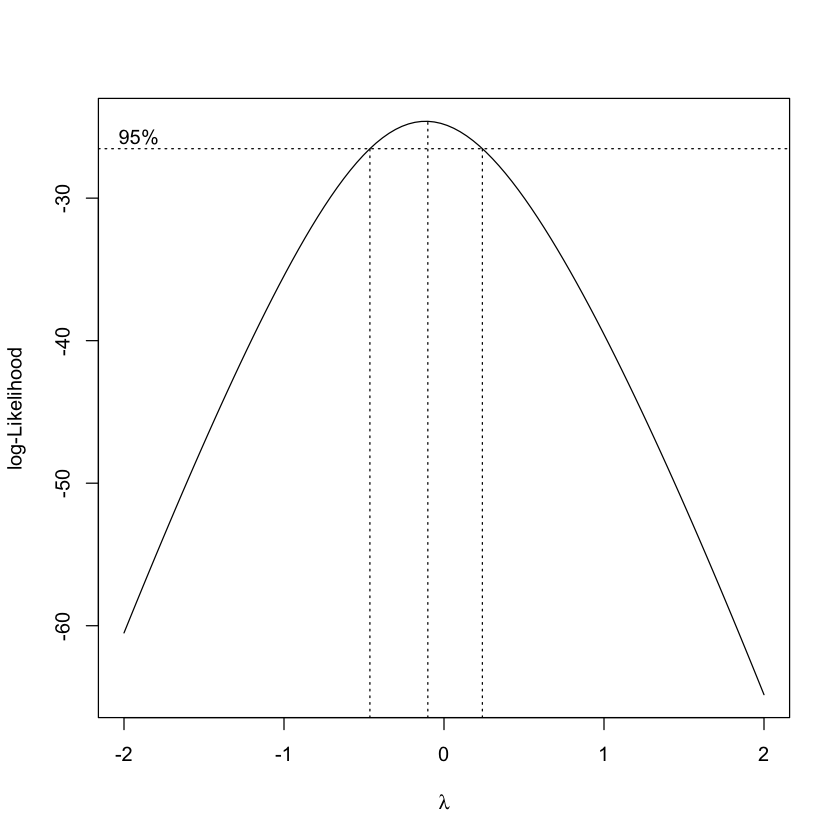

In [17]:
library(MASS)
modl<-lm(shield ~ machine,data=data)
boxcox(modl)

#### d. Compare your results to those given by not doing a transformation.

In [18]:
anova(modl)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
machine,3,18340.16,6113.387,8.051791,0.001483907
Residuals,17,12907.39,759.2581,NA,NA


In [15]:
modl2<-lm(shield^(-1/2) ~ machine, data=data)
anova(modl2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
machine,2,0.2143962,0.1071981,7.74174,0.004070841
Residuals,17,0.2353951,0.01384677,NA,NA


### Cautionary Note.
The usual practice when using Box-Cox transformation is to first estimate $\lambda$. Then the estimated $\lambda$ is viewed as known, and analysis (points estimates, confidence intervals) are carried out in the usual fashion. The uncertainty is typically not considered, and Bickel Dolsum (1981) showed that ignoring this uncertainty in the estimation can inflate the variance of your estimates of the $\mu_i$. Better methods came along for response variables with non-normal, non-homogenous problems, and thus this is not typically done in practice.

## Linear Contrasts.

Say we want to make a statement like, for four groups, (with all of the neccesary assumptions of ANOVA satisfied) is 
$$
\mu_1 - \mu_2 = 0
$$

$$
\mu_3 - \mu_4 = 0 
$$

$$
1/2(\mu_1 + mu_2) - \mu_3 = 0
$$

We call these comparisons linear contrasts.

$$
l = a_1\mu_1 + ... a_k\mu_k 
$$

For finite $k$

Then the estimate for 
$$
\hat{l} = a_1\bar{Y_1} + ... + a_k\bar{Y_k}
$$

The variance for $\hat{l}$ is:

$$
Var(\hat{l}) = \frac{\sum_{i=1}^{k}a_{i}^2\sigma^2}{n}
$$
This is estimated by:

$$
\hat{Var(\hat{l})} = \frac{\sum_{i=1}^{k}a_{i}^2 S^2_W}{n}
$$


#### 1. Write out an equation for equality Machine A and Machine B in the example above in terms of 

$$
l = 0
$$

#### 2. What is your estimate of $l$?

In [16]:
summary(modl) ## this might be helpful.


Call:
lm(formula = shield ~ machine, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.220 -19.595  -8.300   4.435  66.480 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)     8.34      12.32   0.677   0.5076  
machineB        8.46      17.43   0.485   0.6336  
machineC       32.38      15.09   2.145   0.0467 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.55 on 17 degrees of freedom
Multiple R-squared:  0.2429,	Adjusted R-squared:  0.1538 
F-statistic: 2.727 on 2 and 17 DF,  p-value: 0.09393
